In [283]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy.linalg import toeplitz # type: ignore

In [284]:
def quadraticMap(r,x):
    "Quadratic Map: f(x) = r(1/4 - x^2)"
    return r*(0.25 - x*x)

def logisticMap(r,x):
    "Logistic Map: f(x) = rx(1-x)"
    return r*x*(1-x)

# coupling matrix for 1D diffusion, 2 nearest neighbors
def couplingMat(eps,N):
    a = np.array([[1-eps],[eps/2]])
    b = np.zeros((1,N-3))
    c = np.array([[eps/2]])
    #row1 = np.array([[1-eps],[eps/2],[0],[0],[eps/2]])
    row1 = np.concatenate((a,b,c),axis=None)
    return toeplitz(row1)
    

In [285]:
quadraticMap(2.8,0.4)

0.2519999999999999

In [286]:
N = 100
eps = 0.7
r = 2.8

In [287]:
couplingMatrix = couplingMat(eps,N)

In [288]:
couplingMatrix

array([[0.3 , 0.35, 0.  , ..., 0.  , 0.  , 0.35],
       [0.35, 0.3 , 0.35, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.35, 0.3 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.3 , 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.35, 0.3 , 0.35],
       [0.35, 0.  , 0.  , ..., 0.  , 0.35, 0.3 ]])

In [289]:
x = 0.5*np.random.rand(1,N)

In [290]:
x

array([[0.35133528, 0.28916526, 0.27172623, 0.20952408, 0.42785684,
        0.3512949 , 0.42865503, 0.11707508, 0.16267081, 0.11426606,
        0.24307334, 0.39229899, 0.21368974, 0.42855467, 0.22557272,
        0.03187218, 0.18235829, 0.16135123, 0.4488073 , 0.20572807,
        0.32656225, 0.26550616, 0.30920336, 0.49909303, 0.39449567,
        0.19009849, 0.21009856, 0.20173247, 0.15513318, 0.48940573,
        0.18271455, 0.31058101, 0.28302389, 0.02993555, 0.2349885 ,
        0.39885328, 0.14506196, 0.16128152, 0.48149308, 0.1331212 ,
        0.34517332, 0.25140848, 0.14281427, 0.25767751, 0.12926251,
        0.10646792, 0.44403577, 0.17343613, 0.02291408, 0.35670625,
        0.34530651, 0.12796057, 0.185678  , 0.33817148, 0.14017785,
        0.13463872, 0.18639284, 0.45721731, 0.36917325, 0.02732444,
        0.08655449, 0.02102048, 0.25297882, 0.44830607, 0.23235481,
        0.03396704, 0.20505668, 0.13158337, 0.11813659, 0.22926265,
        0.30689693, 0.33698301, 0.01704286, 0.39

In [291]:
x = x.reshape(N,1)
x

array([[0.35133528],
       [0.28916526],
       [0.27172623],
       [0.20952408],
       [0.42785684],
       [0.3512949 ],
       [0.42865503],
       [0.11707508],
       [0.16267081],
       [0.11426606],
       [0.24307334],
       [0.39229899],
       [0.21368974],
       [0.42855467],
       [0.22557272],
       [0.03187218],
       [0.18235829],
       [0.16135123],
       [0.4488073 ],
       [0.20572807],
       [0.32656225],
       [0.26550616],
       [0.30920336],
       [0.49909303],
       [0.39449567],
       [0.19009849],
       [0.21009856],
       [0.20173247],
       [0.15513318],
       [0.48940573],
       [0.18271455],
       [0.31058101],
       [0.28302389],
       [0.02993555],
       [0.2349885 ],
       [0.39885328],
       [0.14506196],
       [0.16128152],
       [0.48149308],
       [0.1331212 ],
       [0.34517332],
       [0.25140848],
       [0.14281427],
       [0.25767751],
       [0.12926251],
       [0.10646792],
       [0.44403577],
       [0.173

In [292]:
fx = logisticMap(r,x)

In [293]:
d = logisticMap(r,x[0])

In [294]:
time = 1000
u = np.zeros((N,time))
u[:,[0]] = x
u

array([[0.35133528, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28916526, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27172623, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04026976, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27336407, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33116848, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [295]:
for n in range(time-1):
        #u[:,[n]] = logisticMap(r,u[:,[n]])
        u[:,[n]] = quadraticMap(r,u[:,[n]])
        u[:,[n+1]] = np.matmul(couplingMatrix,u[:,[n]])

In [296]:
u

array([[ 0.35437785,  0.23643342,  0.58053271, ..., -0.44301404,
         0.35539336,  0.33661087],
       [ 0.46587366,  0.16666636,  0.65979148, ..., -0.54525407,
        -0.02709882,  0.08591001],
       [ 0.4932616 , -0.03690747,  0.65524737, ..., -0.54558606,
        -0.08670861,  0.00773281],
       ...,
       [ 0.69545937, -0.33103581,  0.40300622, ...,  0.49096245,
         0.21522443,  0.30497559],
       [ 0.49076184, -0.08106901,  0.68892669, ...,  0.29484066,
         0.54771219,  0.47911965],
       [ 0.39291682,  0.22084684,  0.65925445, ..., -0.07735893,
         0.68422128,  0.52135332]])

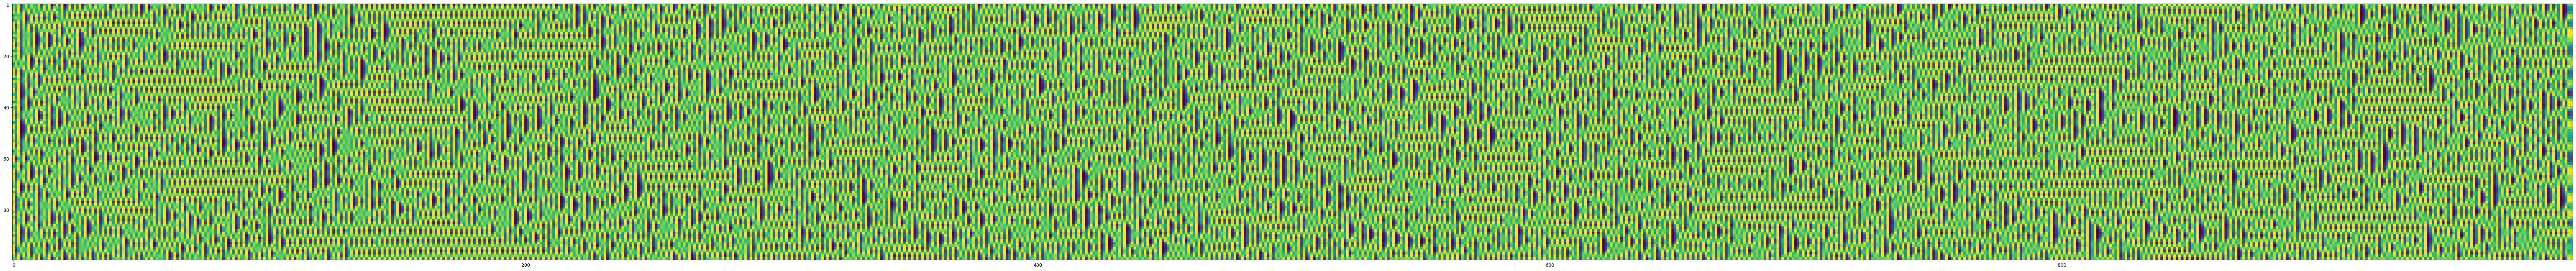

In [297]:
fig, ax = plt.subplots(1,1,figsize=(100,100))

ax.imshow(u,interpolation='nearest')

plt.show()